# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


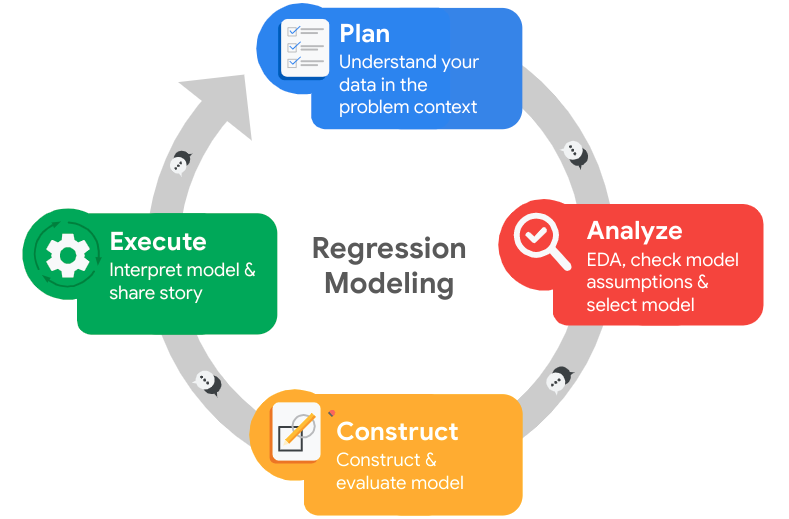

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [87]:
# Import packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)


import matplotlib.pyplot as plt
import seaborn as sns



from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree


import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [88]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [89]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [90]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [91]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [92]:
# Rename columns as needed
df0 = df0.rename(columns={'number_projects': 'projects',
                         'average_montly_hours': 'avg_hpm',
                         'time_spend_company': 'tenure',
                         'Work_accident': 'accident',
                         'Department': 'department',
                         'number_project' : 'projects'})

# Display all column names after the update
df0.head(10)

,satisfaction_level,last_evaluation,projects,avg_hpm,tenure,accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [93]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
projects                 0
avg_hpm                  0
tenure                   0
accident                 0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [94]:
# Check for duplicates
df0.duplicated().sum()

3008

In [95]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,projects,avg_hpm,tenure,accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [96]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1= df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
print(df1.head())
df1.duplicated().sum()

   satisfaction_level  last_evaluation  projects  avg_hpm  tenure  accident  \
0                0.38             0.53         2      157       3         0   
1                0.80             0.86         5      262       6         0   
2                0.11             0.88         7      272       4         0   
3                0.72             0.87         5      223       5         0   
4                0.37             0.52         2      159       3         0   

   left  promotion_last_5years department  salary  
0     1                      0      sales     low  
1     1                      0      sales  medium  
2     1                      0      sales  medium  
3     1                      0      sales     low  
4     1                      0      sales     low  


0

### Check outliers

Check for outliers in the data.

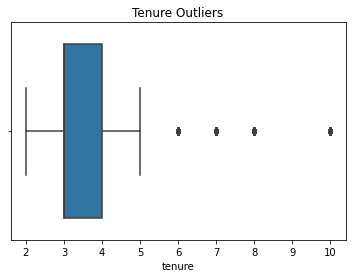

In [97]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.title('Tenure Outliers')
sns.boxplot(data= df1, x = df1['tenure'])


In [98]:
# Determine the number of rows containing outliers
iqr = df1['tenure'].quantile(0.75) - df1['tenure'].quantile(0.25)
upper_limit = df1['tenure'].quantile(0.75)+ 1.5*iqr
lower_limit = df1['tenure'].quantile(0.25) - 1.5*iqr
outlier = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print('Lower limit =', lower_limit)
print('Upper limit =', upper_limit)
print("Number of outliers", len(outlier))


Lower limit = 1.5
Upper limit = 5.5
Number of outliers 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [99]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize = True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Correlation Matrix')

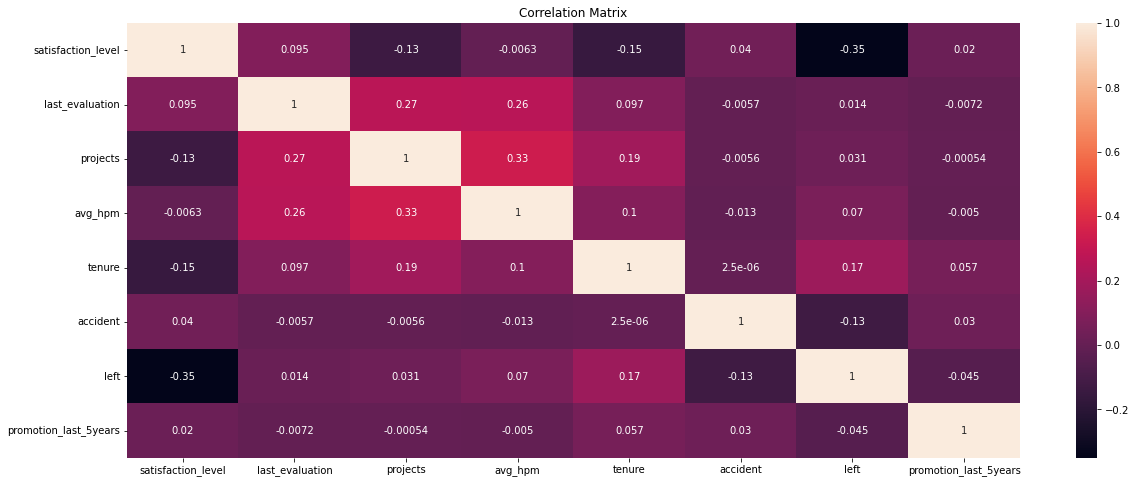

In [100]:
# Create a plot as needed
from scipy import stats
plt.figure(figsize=(20, 8))
cormat = df1.corr()
sns.heatmap(cormat, annot = True)
plt.title("Correlation Matrix")

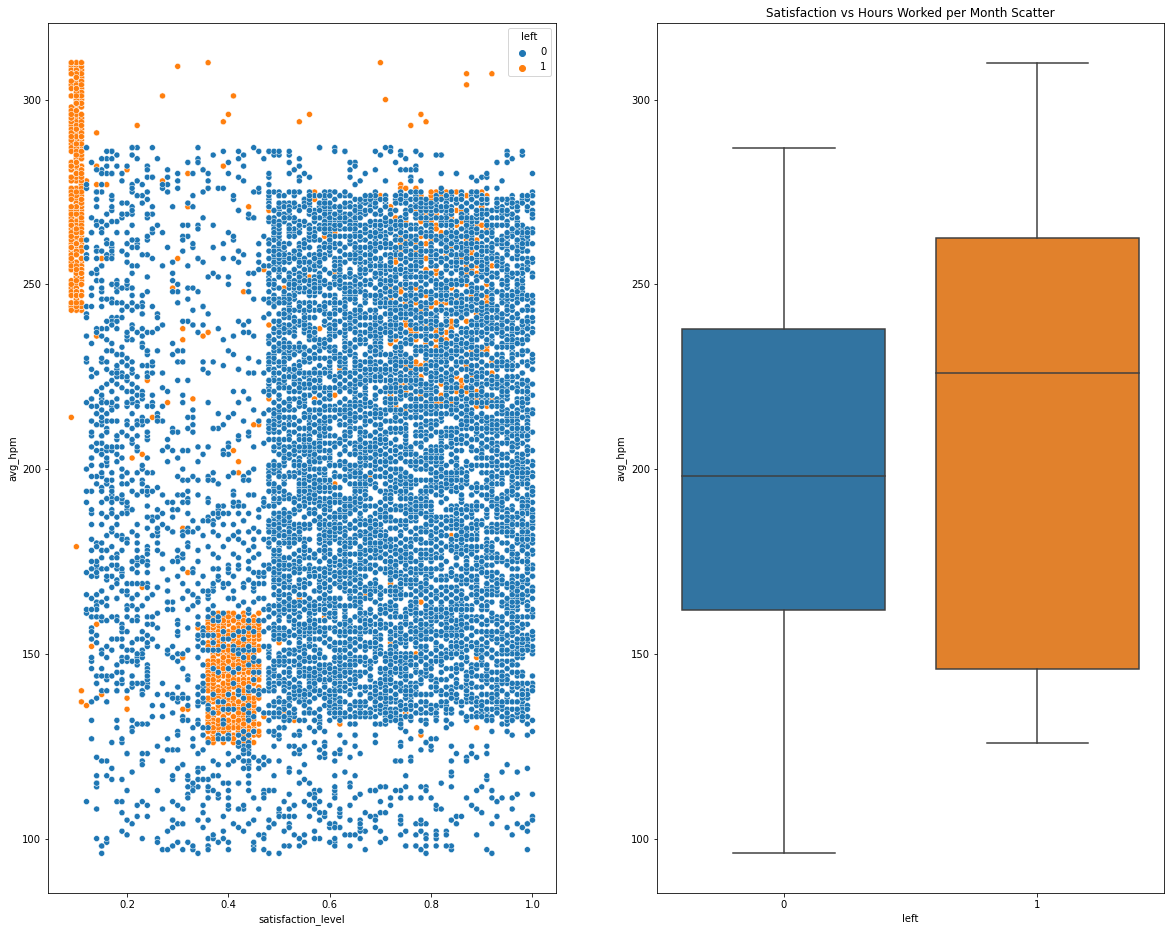

In [101]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(20,16))
sns.scatterplot(data=df1, x = "satisfaction_level", y = 'avg_hpm', hue = 'left', ax = ax[0])
plt.title('Satisfaction vs Hours Worked per Month Scatter')
sns.boxplot(data=df1, x = 'left', y ='avg_hpm', ax= ax[1])


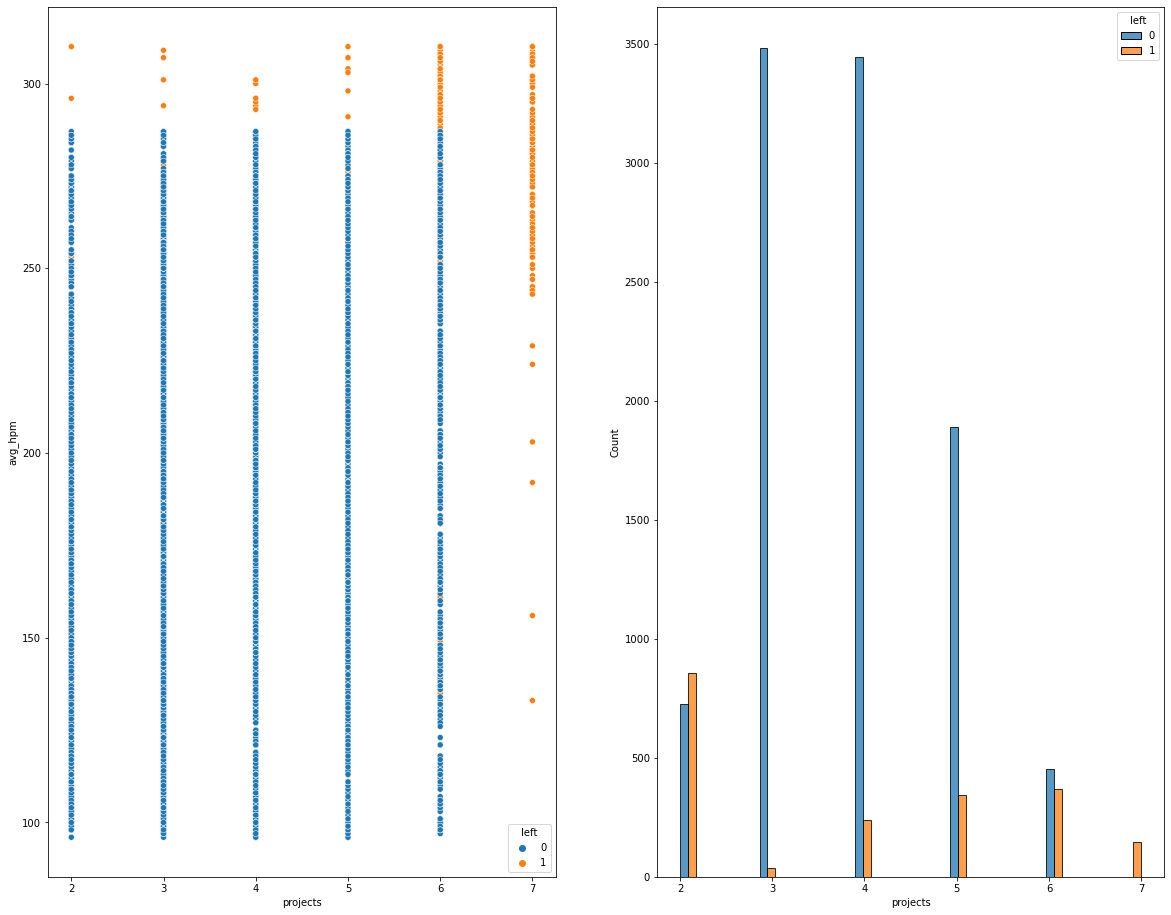

<Figure size 1440x1152 with 0 Axes>

In [102]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(20,16))
plt.figure(figsize=(20,16))
sns.scatterplot(data=df1, x = "projects", y = 'avg_hpm', hue = 'left',  ax=ax[0])
sns.histplot(data =df1,x = "projects", hue = 'left', multiple = 'dodge',  ax=ax[1])


Text(0.5, 1.0, 'Satisfaction by Tenure Distribution')

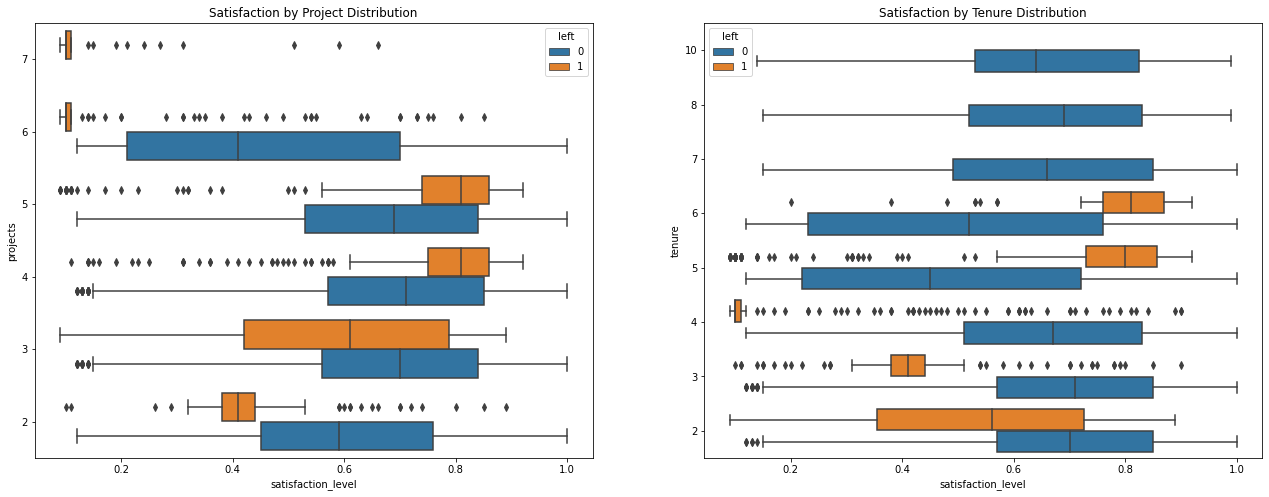

In [103]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(22,8))
sns.boxplot(data= df1, x = "satisfaction_level", y = 'projects', hue = 'left', orient ='h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Satisfaction by Project Distribution")
sns.boxplot(data= df1, x = "satisfaction_level", y = 'tenure', hue = 'left', orient ='h', ax = ax[1])
ax[1].invert_yaxis()
ax[1].set_title("Satisfaction by Tenure Distribution")

In [104]:
Hrs_by_tenure = df1.groupby(['tenure'])['avg_hpm'].agg([np.mean])
print("Hrs_by_tenure",Hrs_by_tenure)
projects_by_tenure = df1.groupby(['tenure'])["projects"].agg([np.mean])
print ("projects_by_tenure",projects_by_tenure)

Hrs_by_tenure               mean
tenure            
2       199.850859
3       190.505780
4       215.950623
5       218.212806
6       208.448339
7       200.744681
8       193.802469
10      199.224299
projects_by_tenure             mean
tenure          
2       3.684880
3       3.457803
4       4.423441
5       4.464218
6       4.167897
7       3.851064
8       3.777778
10      3.682243


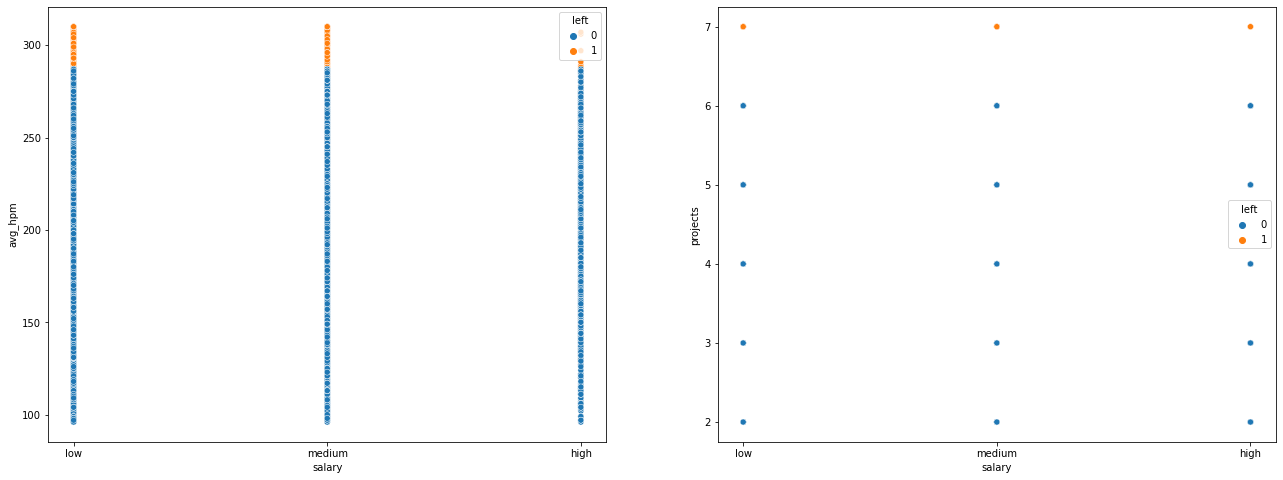

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(22,8))

sns.scatterplot(data= df1, x= 'salary', y= 'avg_hpm', hue= 'left', ax=ax[0])

sns.scatterplot(data= df1, x= 'salary', y= 'projects', hue= 'left', ax=ax[1])

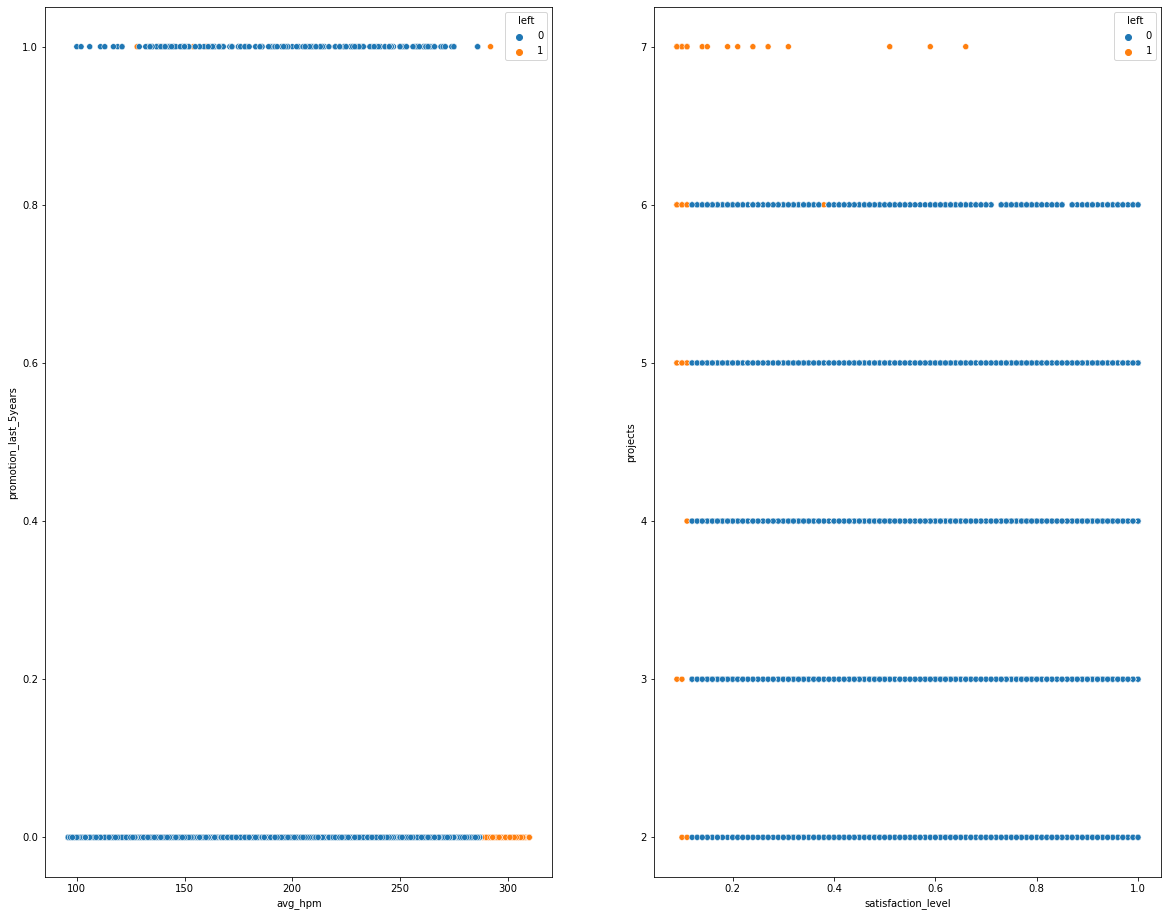

In [106]:
# Create a plot as needed
fig, ax = plt.subplots(1, 2, figsize=(20,16))
sns.scatterplot(data = df1, x = "avg_hpm", y = "promotion_last_5years", hue = "left",ax= ax[0])
sns.scatterplot(data=df1, x = "satisfaction_level", y = 'projects', hue = 'left', ax=ax[1])


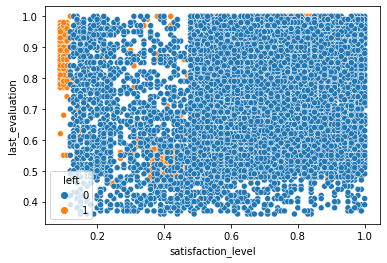

In [107]:
# Create a plot as needed
sns.scatterplot(data=df1, x = 'satisfaction_level', y= "last_evaluation", hue= "left")

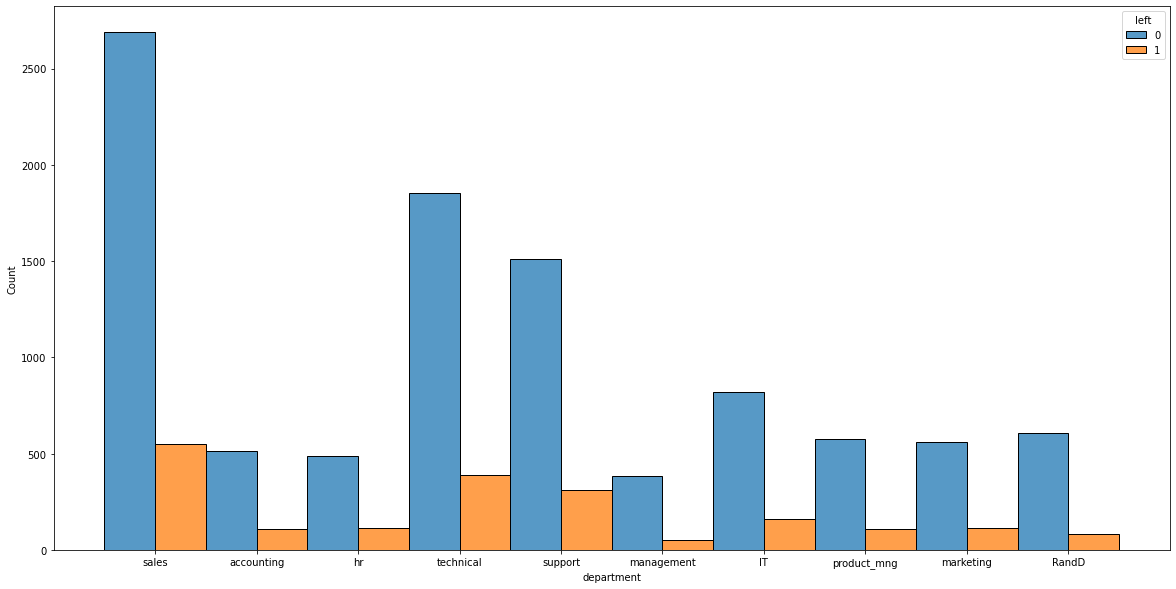

In [108]:
plt.figure(figsize=(20,10))
sns.histplot(data=df1, x= 'department', hue = "left", multiple = 'dodge')



### Insights

[What insights can you gather from the plots you created to visualize the data? 

What is very obvious is that the number of projects, specifically having 7, strongly correlates to low satisfaction and exiting the company. The other strong correlation is with hours worked per month, and whether or not they had been promoted in the last 5 years.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Our goal is to predict whether or not an employee will leave, which is a binary variable of 0 (stay) or 1 (leave)


### Identify the types of models most appropriate for this task.

Logistic regression or tree decision models would both work here given the outcomes we are predicting

### Modeling

Add as many cells as you need to conduct the modeling process.

In [109]:
#Dummy encode categories
df2=df1.copy()

#change salary to categorical
salary_categories = ['low', 'medium', 'high']

df2['salary']= pd.Categorical(df2['salary'], categories = salary_categories, ordered =True)

df2.dtypes

satisfaction_level        float64
last_evaluation           float64
projects                    int64
avg_hpm                     int64
tenure                      int64
accident                    int64
left                        int64
promotion_last_5years       int64
department                 object
salary                   category
dtype: object

In [110]:
#Dummy encoding variables
df2 = pd.get_dummies(df2, drop_first=False)

df2.head(10)

,satisfaction_level,last_evaluation,projects,avg_hpm,tenure,accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,salary_high
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [187]:
### Tree based Model

In [112]:
y = df2['left']
X= df2.drop('left', axis = 1)
X

,satisfaction_level,last_evaluation,projects,avg_hpm,tenure,accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,salary_high
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1
11996,0.74,0.95,5,266,10,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
11997,0.85,0.54,3,185,10,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
11998,0.33,0.65,3,172,10,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [113]:
#Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [114]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# hyperparameters
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6],
              }

# Metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [115]:
%%time
tree.fit(X_train, y_train)

CPU times: user 2.91 s, sys: 4 ms, total: 2.91 s
Wall time: 2.91 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [116]:
tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [117]:
tree.best_score_

0.969819392792457

In [118]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [119]:
tree0_results = make_results('decision tree 0', tree, 'auc')
tree0_results

,model,precision,recall,F1,accuracy,auc
0,decision tree 0,0.914552,0.916949,0.915707,0.971978,0.969819


In [120]:
#Lets do a random forest to ensure we are not overfitting

rf= RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,4],
             'min_samples_split': [2,3,4],
             'n_estimators': [100,300, 500],
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf0 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [121]:
%%time
rf0.fit(X_train, y_train)

CPU times: user 10min 50s, sys: 843 ms, total: 10min 51s
Wall time: 10min 51s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [123]:
rf0.best_score_

0.980416028921927

In [125]:
rf0.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [127]:
rf0_results = make_results('random forest 0', rf0, 'auc')
rf0_results

,model,precision,recall,F1,accuracy,auc
0,random forest 0,0.949886,0.912933,0.931017,0.977538,0.980416


In [128]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [130]:
rf0_test_scores = get_scores('random forest1 test', rf0, X_test, y_test)
rf0_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964135,0.917671,0.940329,0.980654,0.955435


In [ ]:
#As suggested, let's ensure there is no Data leakage with some feature engineering

In [131]:
#drop satisfaction level as feature
df3 = df2.drop('satisfaction_level', axis = 1)
df3.head()

,last_evaluation,projects,avg_hpm,tenure,accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,salary_high
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [164]:
#Create binary overworked column reflective of people working more than 175 hours a week
df3['overworked']= df3['avg_hpm']
df3['overworked']= (df3['overworked'] > 175).astype(int)
df3.head(10)

,last_evaluation,projects,avg_hpm,tenure,accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,salary_high,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
7,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
8,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
9,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [168]:
df3 = df3.drop('avg_hpm', axis=1)
df3.head(10)

,last_evaluation,projects,tenure,accident,left,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,salary_high,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0.86,5,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,0.88,7,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5,0.50,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
6,0.77,6,4,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
7,0.85,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
8,1.00,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
9,0.53,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [169]:
#variables and splits
y = df3['left']
X = df3.drop('left', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [171]:
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [172]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.35 s, sys: 4.01 ms, total: 2.36 s
Wall time: 2.36 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [173]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [174]:
tree1.best_score_

0.9577889277573082

In [176]:
tree1_results = make_results('decision tree1', tree1, 'auc')
tree0_results.append(tree1_results)


,model,precision,recall,F1,accuracy,auc
0,decision tree 0,0.914552,0.916949,0.915707,0.971978,0.969819
0,decision tree1,0.902176,0.904894,0.903168,0.967752,0.964427
0,random forest 0,0.949886,0.912933,0.931017,0.977538,0.980416
0,random forest1,0.906207,0.904892,0.905470,0.968642,0.973970
0,decision tree1,0.902176,0.904894,0.903168,0.967752,0.964427
0,random forest 0,0.949886,0.912933,0.931017,0.977538,0.980416
0,random forest1,0.906207,0.904892,0.905470,0.968642,0.973970
0,decision tree1,0.854952,0.903553,0.878003,0.958189,0.957789


In [177]:
rf = RandomForestClassifier(random_state=0)

# Paramaters
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [100,300, 500],
             }  

# Metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}


rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [178]:
%%time
rf1.fit(X_train,y_train)

CPU times: user 8min 6s, sys: 996 ms, total: 8min 7s
Wall time: 8min 7s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [179]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [180]:
rf1.best_score_

0.965090560708807

In [181]:
rf1_results = make_results('random forest1', rf1, 'auc')
tree1_results.append(rf1_results)

,model,precision,recall,F1,accuracy,auc
0,decision tree1,0.854952,0.903553,0.878003,0.958189,0.957789
0,random forest1,0.862552,0.873392,0.867701,0.955854,0.965091


In [182]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.870406,0.903614,0.8867,0.961641,0.938407


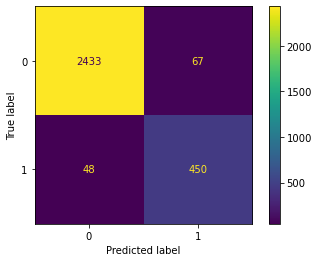

In [183]:
#confusion matrix
preds=rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = rf1.classes_)
disp.plot(values_format='');

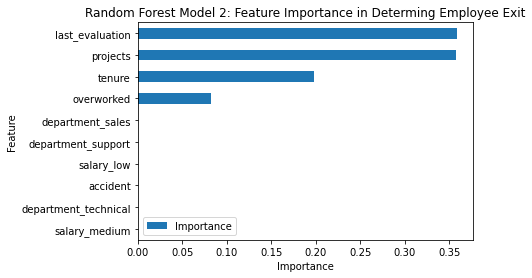

In [185]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]
feat = X.columns[ind]
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest Model 2: Feature Importance in Determing Employee Exit", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

random forest model 1 had  precision 	0.862552 recall	0.873392 f1	0.867701 accuracy	0.955854 and auc	0.965091 metric scores, and outperformed the decision tree model (marginally).

### Conclusion, Recommendations, Next Steps

Our previous assumptions proved true, with workload seeming to be the largest determining factor in employee exit. We recommend the following:

* Cap the total number of projects below 6
* Delivery of last evaluation may negativley impact employee sense of stability in company
* The distribution of salary shows no reward for longer hours. Capping the amount of hours worked or increasing the reward for longer hours would be beneificial 
* Consider reward or promotion based on time spent at the company

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.